In [30]:
%pip install pandas
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '10yrs.csv'  # Adjust if the file is in another directory
data = pd.read_csv(r"C:\Users\srishti.a.yadav\Downloads\10yrs.csv")

# Display the first few rows of the dataset to understand its structure
print(data.head())

Note: you may need to restart the kernel to use updated packages.
         Date      Open      High       Low     Close   Shares Traded   \
0  05-MAR-2024  22371.25  22416.90  22269.15  22356.30       296153036   
1  06-MAR-2024  22327.50  22497.20  22224.35  22474.05       312262560   
2  07-MAR-2024  22505.30  22525.65  22430.00  22493.55       379865142   
3  11-MAR-2024  22517.50  22526.60  22307.25  22332.65       277897373   
4  12-MAR-2024  22334.45  22452.55  22256.00  22335.70       299201167   

   Turnover (₹ Cr)  
0         29165.37  
1         31029.01  
2         33558.46  
3         27222.37  
4         29781.12  


In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             248 non-null    object 
 1   Open             248 non-null    float64
 2   High             248 non-null    float64
 3   Low              248 non-null    float64
 4   Close            248 non-null    float64
 5   Shares Traded    248 non-null    int64  
 6   Turnover (₹ Cr)  248 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB
None


In [32]:
print(data.isnull().sum())

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64


C:\Users\srishti.a.yadav\AppData\Local\Temp\ipykernel_5916\1427170021.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


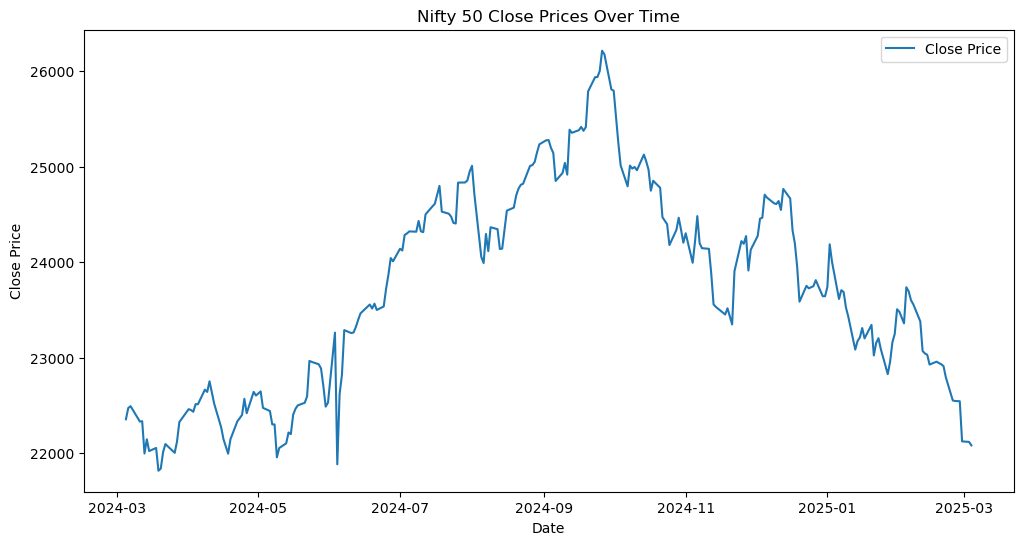

In [34]:
import matplotlib.pyplot as plt

# Ensure the 'Date' column is correctly referenced
data.columns = data.columns.str.strip()  # Remove any leading/trailing spaces from column names

# Convert the 'Date' column to datetime if it's not already in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot the 'Close' prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Nifty 50 Close Prices Over Time')
plt.legend()
plt.show()

In [35]:
%pip install scikit-learn

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [39]:
data = pd.read_csv(r"C:\Users\srishti.a.yadav\Downloads\10yrs.csv")

In [40]:
print(data.head())

         Date      Open      High       Low     Close   Shares Traded   \
0  05-MAR-2024  22371.25  22416.90  22269.15  22356.30       296153036   
1  06-MAR-2024  22327.50  22497.20  22224.35  22474.05       312262560   
2  07-MAR-2024  22505.30  22525.65  22430.00  22493.55       379865142   
3  11-MAR-2024  22517.50  22526.60  22307.25  22332.65       277897373   
4  12-MAR-2024  22334.45  22452.55  22256.00  22335.70       299201167   

   Turnover (₹ Cr)  
0         29165.37  
1         31029.01  
2         33558.46  
3         27222.37  
4         29781.12  


In [41]:
print(data.isnull().sum())

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64


In [42]:
data = data.dropna()

In [45]:
# Ensure the 'Open' column is correctly referenced
data.columns = data.columns.str.strip()  # Remove any leading/trailing spaces from column names

# Select feature (e.g., "Close" or any other feature columns)
X = data[['Open']]  # or use more columns like data[['Open', 'High', 'Low']]
y = data['Close']


In [46]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Convert 'High' and 'Close' columns to numeric
X_train['Open'] = pd.to_numeric(X_train['Open'], errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Drop any rows with NaN values that may have been introduced during conversion
X_train = X_train.dropna()
y_train = y_train.dropna()

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [49]:
# Predict the target variable using test data
y_pred = model.predict(X_test)

# Calculate R-squared score
r2_score = model.score(X_test, y_test)
print(f"R^2 Score: {r2_score}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


R^2 Score: 0.9814437747233086
Mean Squared Error: 18922.96224717085


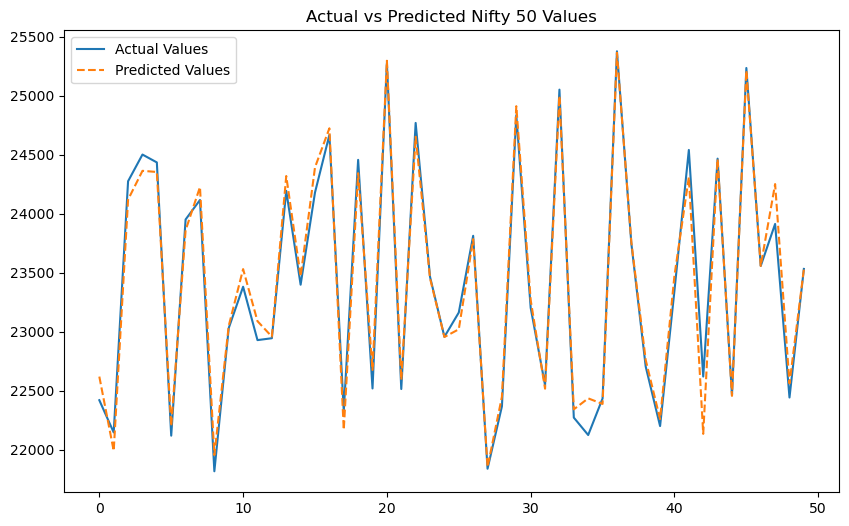

In [50]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values')
plt.plot(y_pred, label='Predicted Values', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Nifty 50 Values')
plt.show()


In [51]:
%pip install beautifulsoup4 requests

Note: you may need to restart the kernel to use updated packages.


In [53]:
import requests
from bs4 import BeautifulSoup

# Function to scrape news headlines
def scrape_news():
    url = 'https://finance.yahoo.com/'  # Example URL (can be replaced with a finance news website)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract headlines (modify based on the website structure)
    headlines = soup.find_all('a', class_='storylink')
    news = [headline.get_text() for headline in headlines]
    
    return news

# Get the latest news
news = scrape_news()
print(news)

[]


In [54]:
%pip install textblob

from textblob import TextBlob

# Perform sentiment analysis on news headlines
sentiment_scores = [TextBlob(article).sentiment.polarity for article in news]
print(sentiment_scores)


[]



In [55]:
# Ensure sentiment_scores is populated correctly
if len(sentiment_scores) == 0:
	# Generate dummy sentiment scores for demonstration purposes
	sentiment_scores = [0] * len(X)  # Replace with actual sentiment analysis if available

# Assuming you have a sentiment column, add it to your existing features (X)
X['Sentiment'] = sentiment_scores[:len(X)]  # Make sure sentiment data length matches X


C:\Users\srishti.a.yadav\AppData\Local\Temp\ipykernel_5916\1655743295.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sentiment'] = sentiment_scores[:len(X)]  # Make sure sentiment data length matches X


In [56]:
print(sentiment_scores)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
